<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW3/HW3_JHicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [6]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


loading HW2 cause that is where the data is, even if this is HW3

In [7]:
allfiles = np.sort(np.array(glob.glob('/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/*.txt')))
allfiles

array(['/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/a.us.txt',
       '/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/aa.us.txt',
       '/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/aaap.us.txt',
       ..., '/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/zx.us.txt',
       '/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/zyme.us.txt',
       '/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/zyne.us.txt'],
      dtype='<U65')

# Part 1: data ingestion, exploration, preparation 
#...continuing on from HW2... 
you can start with the HW2 notebook you created or my solution which is in https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW2


# ...

In [8]:
allfiles = np.sort(np.array(glob.glob('/content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks/*.txt')))
df1 = pd.read_csv(allfiles[0], usecols = ("Date", "Close"))
df2 = pd.read_csv(allfiles[1], usecols = ("Date", "Close"))
df3 = pd.read_csv(allfiles[2], usecols = ("Date", "Close"))
df4 = pd.read_csv(allfiles[3], usecols = ("Date", "Close"))
df5 = pd.read_csv(allfiles[4], usecols = ("Date", "Close"))
df6 = pd.read_csv(allfiles[5], usecols = ("Date", "Close"))
df7 = pd.read_csv(allfiles[6], usecols = ("Date", "Close"))
df8 = pd.read_csv(allfiles[7], usecols = ("Date", "Close"))
df9 = pd.read_csv(allfiles[8], usecols = ("Date", "Close"))
df10 = pd.read_csv(allfiles[9], usecols = ("Date", "Close"))


  

tss = pd.DataFrame.merge(df1, df2, on = 'Date', suffixes = ("_a","_aa"))
tss = pd.DataFrame.merge(tss, df3, on = 'Date', suffixes = ("","_aaap"))
tss = pd.DataFrame.merge(tss, df4, on = 'Date', suffixes = ("","_aaba"))
tss = pd.DataFrame.merge(tss, df5, on = 'Date', suffixes = ("","_aac"))
tss = pd.DataFrame.merge(tss, df6, on = 'Date', suffixes = ("","_aal"))
tss = pd.DataFrame.merge(tss, df7, on = 'Date', suffixes = ("","_aamc"))
tss = pd.DataFrame.merge(tss, df8, on = 'Date', suffixes = ("","_aame"))
tss = pd.DataFrame.merge(tss, df9, on = 'Date', suffixes = ("","_aan"))
tss = pd.DataFrame.merge(tss, df10, on = 'Date', suffixes = ("","_aaoi"))
 

tss.rename(columns = {'Close':'Close_aaap'}, inplace = True) #For some reason, it doesnt like adding _aaap to the data for that stock. This line forces it to do that
tss.set_index("Date", inplace = True)


## testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [9]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
Close_a is stationary: False
Close_aa is stationary: False
Close_aaap is stationary: False
Close_aaba is stationary: False
Close_aac is stationary: False
Close_aal is stationary: False
Close_aamc is stationary: False
Close_aame is stationary: True
Close_aan is stationary: False
Close_aaoi is stationary: False


# 1. Question: why did I set the threshold to 0.05? what does 0.05 mean? 
The threshold 0.05 is commonly accepted as the alpha value in a statistical test. you are willing to accept a 5% change that the data is this extreme, given random varation. Generally, this is a low enough chance to be sure that the data come from different distributions. 5% also represents two standard deviations.

# 2. Task: measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


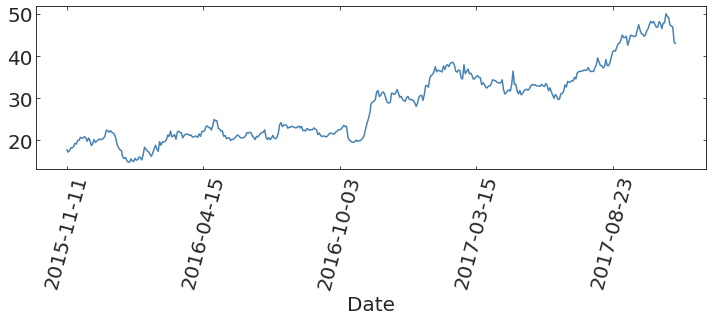

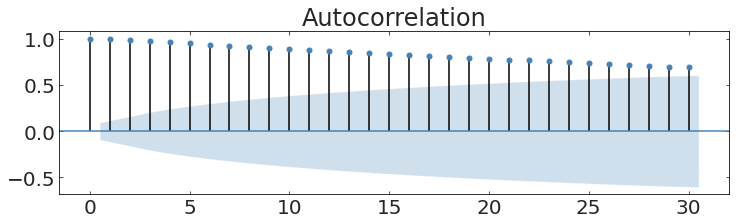

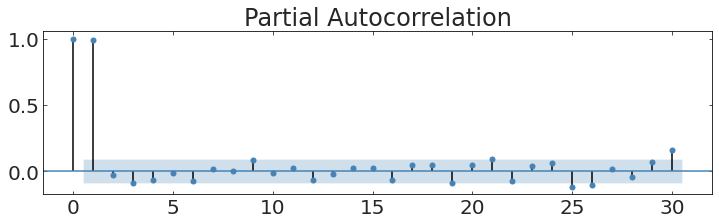

In [10]:
tss["Close_aa"].plot(rot=75, figsize=(12,3));
ax = pl.figure(figsize=(12,3)).add_subplot(111)
sm.graphics.tsa.plot_acf(tss["Close_aa"], lags=30, ax=ax)
ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss["Close_aa"], lags=30, ax=ax);

Fig 4: ...

# 3. Question: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made
I have chosen to plot the 'aa' closing time. Based on the auto-correlation function and the partial-auto-correlation function, I believe that up to 30 lags of the ACF are significant and 2 of the partial ACF are significant. To save on computation time, I will only account for 2 lags for p and q.

# 4. Task: training and testing split
To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set

you do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data

In [11]:
train_set = tss['Close_aa'][:-60]

test_set = tss['Close_aa'][-60:]


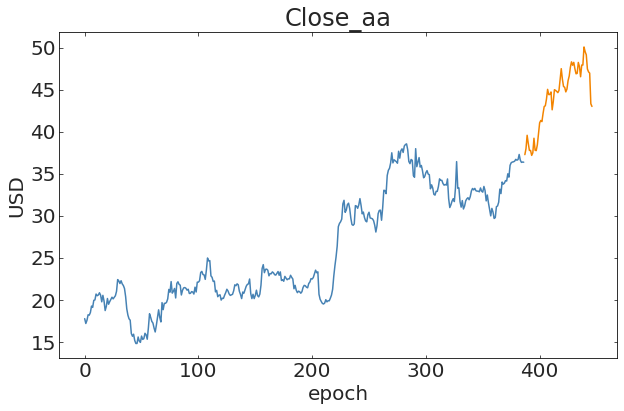

In [12]:


pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"Close_aa"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"Close_aa"][-60:]);
pl.title("Close_aa")
pl.xlabel("epoch")
pl.ylabel("USD");

# Part 2: Model and Forecast
Here we are doing sock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future. 


To fit the model to the data use ```statsmodels.api.tsa.ARMA```

You can inspect the function call as ```statsmodels.api.tsa.ARMA?```
The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

To look at the model result, including the AIC,  look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb



In [13]:
model = sm.tsa.ARMA(endog = train_set, order = (2,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Close_aa   No. Observations:                  387
Model:                     ARMA(2, 2)   Log Likelihood                -449.678
Method:                       css-mle   S.D. of innovations              0.769
Date:                Mon, 28 Feb 2022   AIC                            911.356
Time:                        20:45:00   BIC                            935.106
Sample:                             0   HQIC                           920.773
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.5738      5.611      4.736      0.000      15.577      37.571
ar.L1.Close_aa     0.3732      0.267      1.400      0.162      -0.149       0.896
ar.L2.Close_aa     0.6193      0.265      2.335      0.020       0.100       1.139
ma.L1.Close_aa     0.6190      0.265      2.336      0.020       0.100       1.138
ma.L2.Close_aa    -0.0585      0.049     -1.204      0.229      -0.154       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0046           +0.0000j            1.0046            0.0000
AR.2           -1.6073           +0.0000j            1.6073            0.5000
MA.1           -1.4239           +0.0000j            1.4239            0.5000
MA.2           12.0100           +0.0000j           12.0100            0.0000
-----------------------------------------------------------------------------
"""

# 5. Task: Fit one of the stationary time series with ARMA
a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters. 

b. At each loop step record the AIC score for each fit. 

c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

#**NOTE: aame, the only test listed as stationarity by AD fuller, is not recognized as stationary by the ARMA formulation. For this reason, I use aa(even though it is not stationary by AD fuller)**

In [25]:
#example of model output
mod = sm.tsa.ARMA(tss[['Close_aa']], (1,1)).fit()

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Close_aa   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                -542.951
Method:                       css-mle   S.D. of innovations              0.811
Date:                Mon, 28 Feb 2022   AIC                           1093.902
Time:                        20:50:58   BIC                           1110.312
Sample:                             0   HQIC                          1100.372
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             29.6183      8.311      3.564      0.000      13.328      45.908
ar.L1.Close_aa     0.9971      0.003    328.990      0.000       0.991       1.003
ma.L1.Close_aa     0.0067      0.049      0.136      0.892      -0.090       0.103
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0029           +0.0000j            1.0029            0.0000
MA.1         -149.8889           +0.0000j          149.8889            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
aics = np.zeros((5,5))
for p in range(1,6):
  for q in range(1,6):
    aics[p-1,q-1] = sm.tsa.ARMA(tss[['Close_aa']], (p,q)).fit().aic

print("best parameters: ", np.where(aics == np.nanmin(aics)))


best parameters:  (array([3]), array([4]))


## 6. Task: predict the in-set (training) and the future alues

you can use ```mod.plot_predict()``` to generate and visualize the prediction at once

In [30]:
# the lenght of the data
N = tss[['Close_aa']].shape[0]

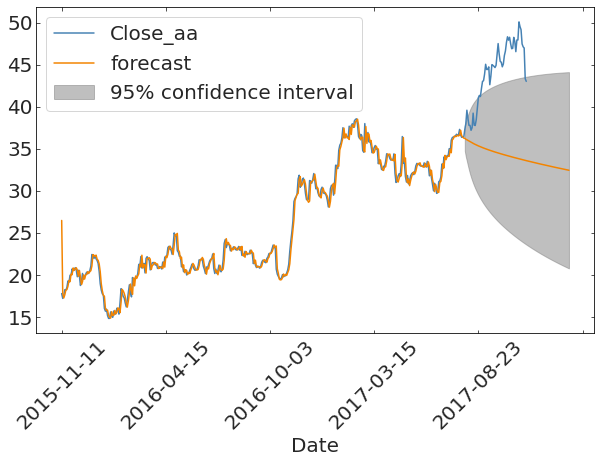

In [31]:
ax = tss[['Close_aa']].plot()
mod = sm.tsa.ARMA(tss['Close_aa'][0:-60], (3,4)).fit()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# 7. Question: Did you make money??
No. I would not make money using this. My 95% confience interval get VERY large very quickly, and inference cannot be effectively made from this. The accuracy of data is magnificent in the training period, but this makes no claim to the testing period.

In [ ]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Close_aa   No. Observations:                  387
Model:                     ARMA(3, 4)   Log Likelihood                -446.111
Method:                       css-mle   S.D. of innovations              0.762
Date:                Mon, 28 Feb 2022   AIC                            910.223
Time:                        18:14:33   BIC                            945.848
Sample:                             0   HQIC                           924.349
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.4745      5.574      4.750      0.000      15.550      37.399
ar.L1.Close_aa     2.3134      0.004    561.324      0.000       2.305       2.322
ar.L2.Close_aa    -1.6766      0.006   -292.282      0.000      -1.688      -1.665
ar.L3.Close_aa     0.3630      0.004     90.939      0.000       0.355       0.371
ma.L1.Close_aa    -1.3371      0.050    -26.526      0.000      -1.436      -1.238
ma.L2.Close_aa     0.3622      0.085      4.270      0.000       0.196       0.528
ma.L3.Close_aa     0.1707      0.085      2.016      0.045       0.005       0.337
ma.L4.Close_aa    -0.1534      0.051     -3.005      0.003      -0.253      -0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0043           +0.0000j            1.0043            0.0000
AR.2            1.0839           +0.0000j            1.0839            0.0000
AR.3            2.5309           +0.0000j            2.5309            0.0000
MA.1           -2.2450           -0.0000j            2.2450           -0.5000
MA.2            1.0590           -0.0000j            1.0590           -0.0000
MA.3            1.1495           -1.1922j            1.6561           -0.1279
MA.4            1.1495           +1.1922j            1.6561            0.1279
-----------------------------------------------------------------------------
"""

# 8. Question: what are the coefficients of the best fit model? what do they mean? 
In my best fit model, I see that the first two terms of my auto-regressive piece of the function are quite important in prediction, and this drops off by the third. Statistical significance is still maintained, however. I also see that the moving average has influence in the first 4 terms, but is largely negligible in comparion to the auto regression.

#  9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model

choose integration 1 to start ...

best parameters:  (array([3]), array([2]))


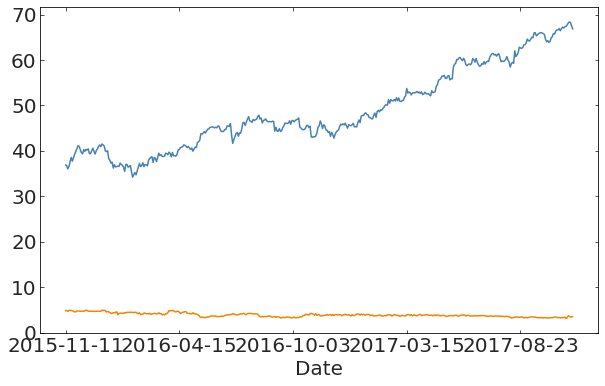

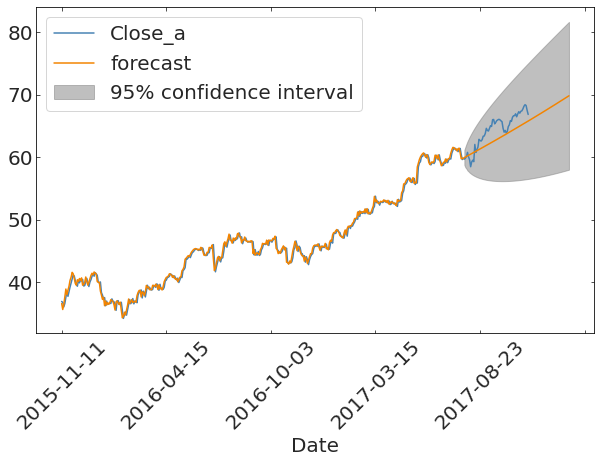

In [100]:
ax = tss['Close_a'].plot()
tss['Close_aame'].plot(ax=ax)

#Start with aal

mod = sm.tsa.ARIMA(endog = tss['Close_a'], order = (1,1,1)).fit()
mod.summary()

aics = {}
aics = np.zeros((5,5))
for p in range(1,6):
  for q in range(1,6):
    aics[p-1,q-1] = sm.tsa.ARIMA(tss[['Close_a']], (p,2,q)).fit().aic

print("best parameters: ", np.where(aics == np.nanmin(aics)))


N = tss[['Close_a']].shape[0]
ax = tss[['Close_a']].plot()
mod = sm.tsa.ARIMA(tss['Close_a'][0:-60], (4,2,3)).fit()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);



best parameters:  (array([1]), array([0]))


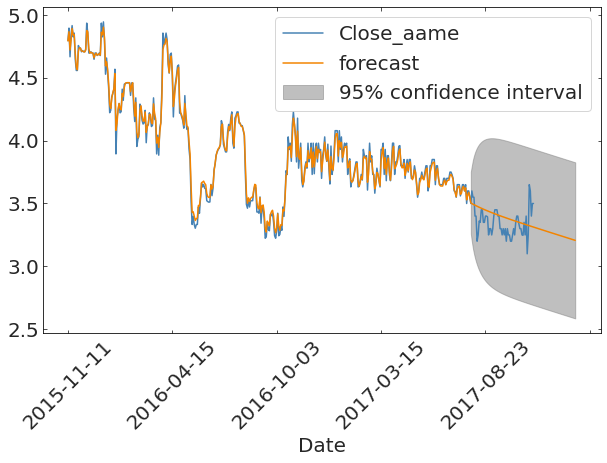

In [99]:


mod = sm.tsa.ARIMA(endog = tss['Close_aame'], order = (1,1,1)).fit()
mod.summary()

aics = {}
aics = np.zeros((5,5))
for p in range(1,4):
  for q in range(1,4):
    aics[p-1,q-1] = sm.tsa.ARIMA(tss['Close_aame'], (p,1,q)).fit().aic

print("best parameters: ", np.where(aics == np.nanmin(aics)))


N = tss[['Close_aame']].shape[0]
ax = tss[['Close_aame']].plot()
mod = sm.tsa.ARIMA(tss['Close_aame'][0:-60], (2,1,1)).fit()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


#10. Question: Did you get rich?
Although the predictions are better, I do not think this would be sufficiently accurate to profit off of. I had particular difficulty getting these models to work at all(AD fuller and whatever stationarity test this code runs give different answers for stationarity), and for some reason, some iterations of P, D, and Q do not allow stationarity, so I had to force some variables. Given this, the data may not be reliable. The 95% intervals blow up too quickly to make use of the data in any meaningful way.

# 11 Task: Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

best parameters:  (array([0]), array([1]))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Close_aame   No. Observations:                  386
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 247.076
Method:                       css-mle   S.D. of innovations              0.128
Date:                Mon, 28 Feb 2022   AIC                           -488.151
Time:                        21:45:09   BIC                           -476.284
Sample:                             1   HQIC                          -483.445
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0034      0.005     -0.655      0.513      -0.014       0.007
ar.L1.D.Close_aame    -0.2565      0.049     -5.217      0.000      -0.353      -0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.8986           +0.0000j            3.8986            0.5000
-----------------------------------------------------------------------------
"""

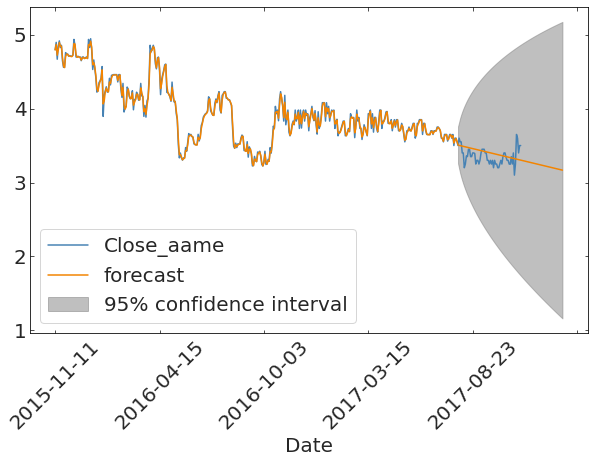

In [103]:


mod = sm.tsa.ARIMA(endog = tss['Close_aame'], order = (1,2,1)).fit()
mod.summary()

aics = {}
aics = np.zeros((5,5))
for p in range(1,4):
  for q in range(1,4):
    aics[p-1,q-1] = sm.tsa.ARIMA(tss['Close_aame'], (p,2,q)).fit().aic

print("best parameters: ", np.where(aics == np.nanmin(aics)))


N = tss[['Close_aame']].shape[0]
ax = tss[['Close_aame']].plot()
mod = sm.tsa.ARIMA(tss['Close_aame'][0:-60], (1,1,0)).fit()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
mod.summary()


Using a lower order for prediction of aame allows for the model to be run with a different differentiating capacity. This model is less confident than d=1. This may be due to stationarity at d=1 that makes d=2 irrelevant. The coeficients of the model show that the auto-regressive component is all that is really used, and it has a small, but noticeable impact.